# Question definition 


Studying the factors that affect the price of housing and coming up with a model that can predict the price of houses based on the variables provided.


*Methods*

- Lasso regression
- Elastic net regression
- Ridge regression

# Metric for Success

- A model that has an accuracy of above 50%. 
- Creating  models using different regressions then check the one with the highest score.



# Data appropriateness
The data fit for the problem that we are trying to solve.



## Importing libraries


In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [10]:

#loading the dataset
url='http://bit.ly/IndependentProjectWeek7Dataset'
housing=pd.read_csv(url)
housing.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## Data preparation


In [11]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


All data is numerical: floats and integers.



In [12]:
#checking for null
housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:

#checking duplicates
housing.duplicated().sum()

3

In [0]:

#dropping the duplicates
housing.drop_duplicates(keep='first', inplace = True)

In [15]:
housing.columns


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:

#log transforming our price.
housing['price'] = np.log(housing['price'])

In [17]:
#renaming columns
housing.columns=map(str.lower, housing.columns)


columns= ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'latitude', 'longitude',
       'sqft_living15', 'sqft_lot15']     
housing.columns=columns
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
housing.drop(columns=['latitude','longitude','grade'], inplace=True)


Checking for outliers and anomalies


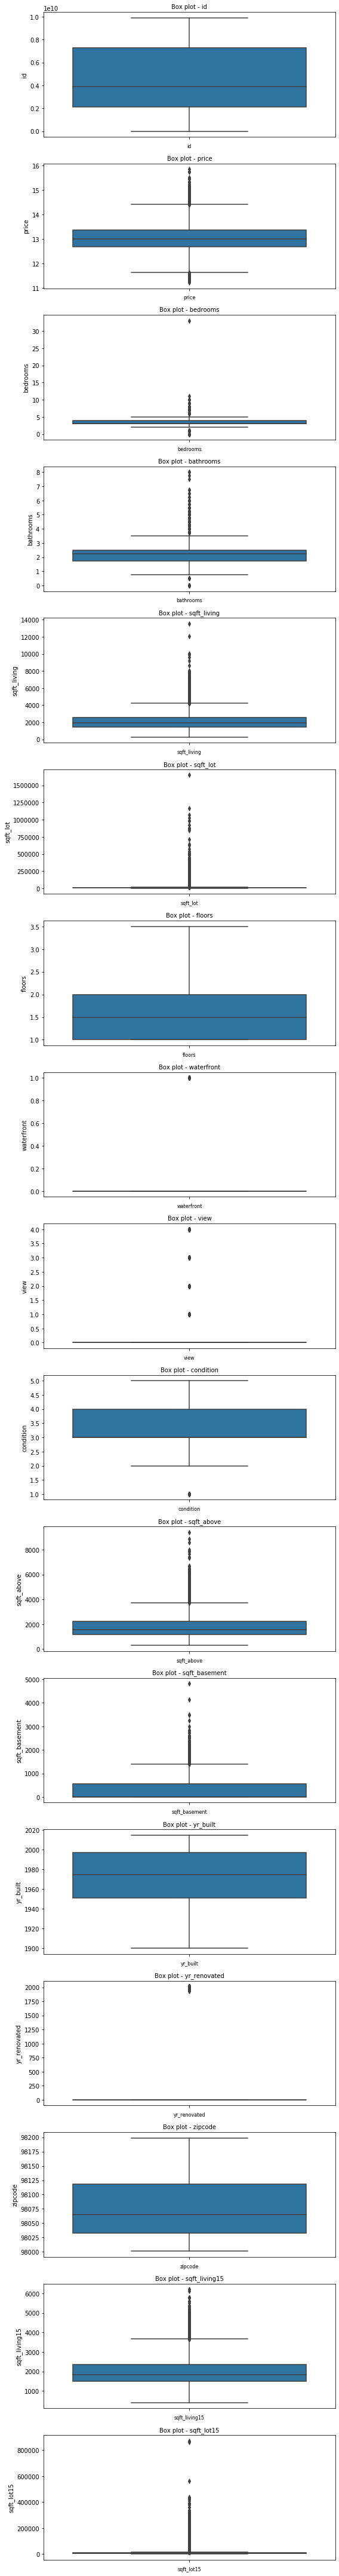

In [19]:

#checking for outliers in our dataset
col_names = numeric_clmns = housing.dtypes[housing.dtypes != "object" ].index

fig, ax = plt.subplots(len(col_names), figsize=(8,60))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=housing[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()

In [0]:

#Dealing with outliers by removing the isolated extreme data in the sqft_living, sqft_lot and bredrooms column.
housing= housing[((housing['bedrooms']<=30)& (housing['sqft_lot15']<=10000)& (housing['sqft_lot15']<=125000 ))]

# Regression


### Polynomial Regression
A polynomial regression to compare it with the other values.



In [0]:

x=housing[['bedrooms','floors','sqft_above', 'sqft_living','floors', 'waterfront', 'view']]
y=housing[['price']]

In [0]:
#splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [23]:

# We then fit Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures()
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#running teh target predictions
y_pred = pol_reg.predict(x_poly)

In [25]:

# measuring the accuracy of our model using RMSE
from sklearn.metrics import mean_squared_error
#
rmse = (mean_squared_error(y, y_pred))
#
print(rmse)

0.12758574713582752


Elastic Net Regression


In [0]:
x=housing[['bedrooms','floors','sqft_above', 'sqft_living','floors', 'waterfront', 'view']]
y=housing[['price']]

In [0]:
#splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [0]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [29]:
search.fit(x,y)
search.best_params_
abs(search.best_score_)

0.13178353625951708

In [30]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(x,y)
mse=(mean_squared_error(y_true=y,y_pred=elastic.predict(x)))
print(mse)

0.20057843303119205


In [31]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': 0.004219180622898423,
 'floors': 0.007751273747227923,
 'sqft_above': 3.251753834139877e-05,
 'sqft_living': 4.7356221674906714e-05,
 'view': 0.013104568463449014,
 'waterfront': 0.0}

In [32]:
print("elactic net score:", elastic.score(x_test, y_test))


elactic net score: 0.14761943104932973


### Lasso Regression


In [0]:

from sklearn.preprocessing import StandardScaler
#scaling the data 
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [0]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 
linear.fit(x_train, y_train) 

print("lasso score:", gridlasso.score(x_test, y_test))
print("linear score:", linear.score(x_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(x_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(x_test)))

lasso score: 0.3487740463881591
linear score: 0.44155256359367323
lasso MSE: 0.15480850930987958
linear MSE: 0.13275333189425775


Ridge Regression


In [0]:
from sklearn.linear_model import Ridge


In [39]:
#determinining the most reasonable L2 regularization
ridge = Ridge(normalize=True)

#finding the best parameters from our grid search to get the best score
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(x,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_)

0.1310069521693381

In [40]:
#using 0.01 s the alpha 
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(x,y)
mse = (mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
print(mse)


0.13094313717000441


In [41]:
print("ridge score:", ridge.score(x_test, y_test))


ridge score: 0.44118304833751143


Conclusion

The scores of the models were as follows:

- ridge: 0.44118304833751143
- linear: 0.44155256359367323
- elastic net: 0.14761943104932973
- lasso: 0.3487740463881591


According the models had relatively low score however ridge regression had the highest score . The low scores could be as a result of underfitting.